In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

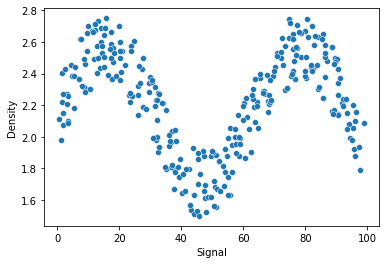

In [5]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [19]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_model = LinearRegression()

In [24]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
lr_preds = lr_model.predict(X_test)

In [26]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [29]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.25700519965846297

In [32]:
signal_range = np.arange(0,100)

In [33]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [34]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [36]:
#signal_preds

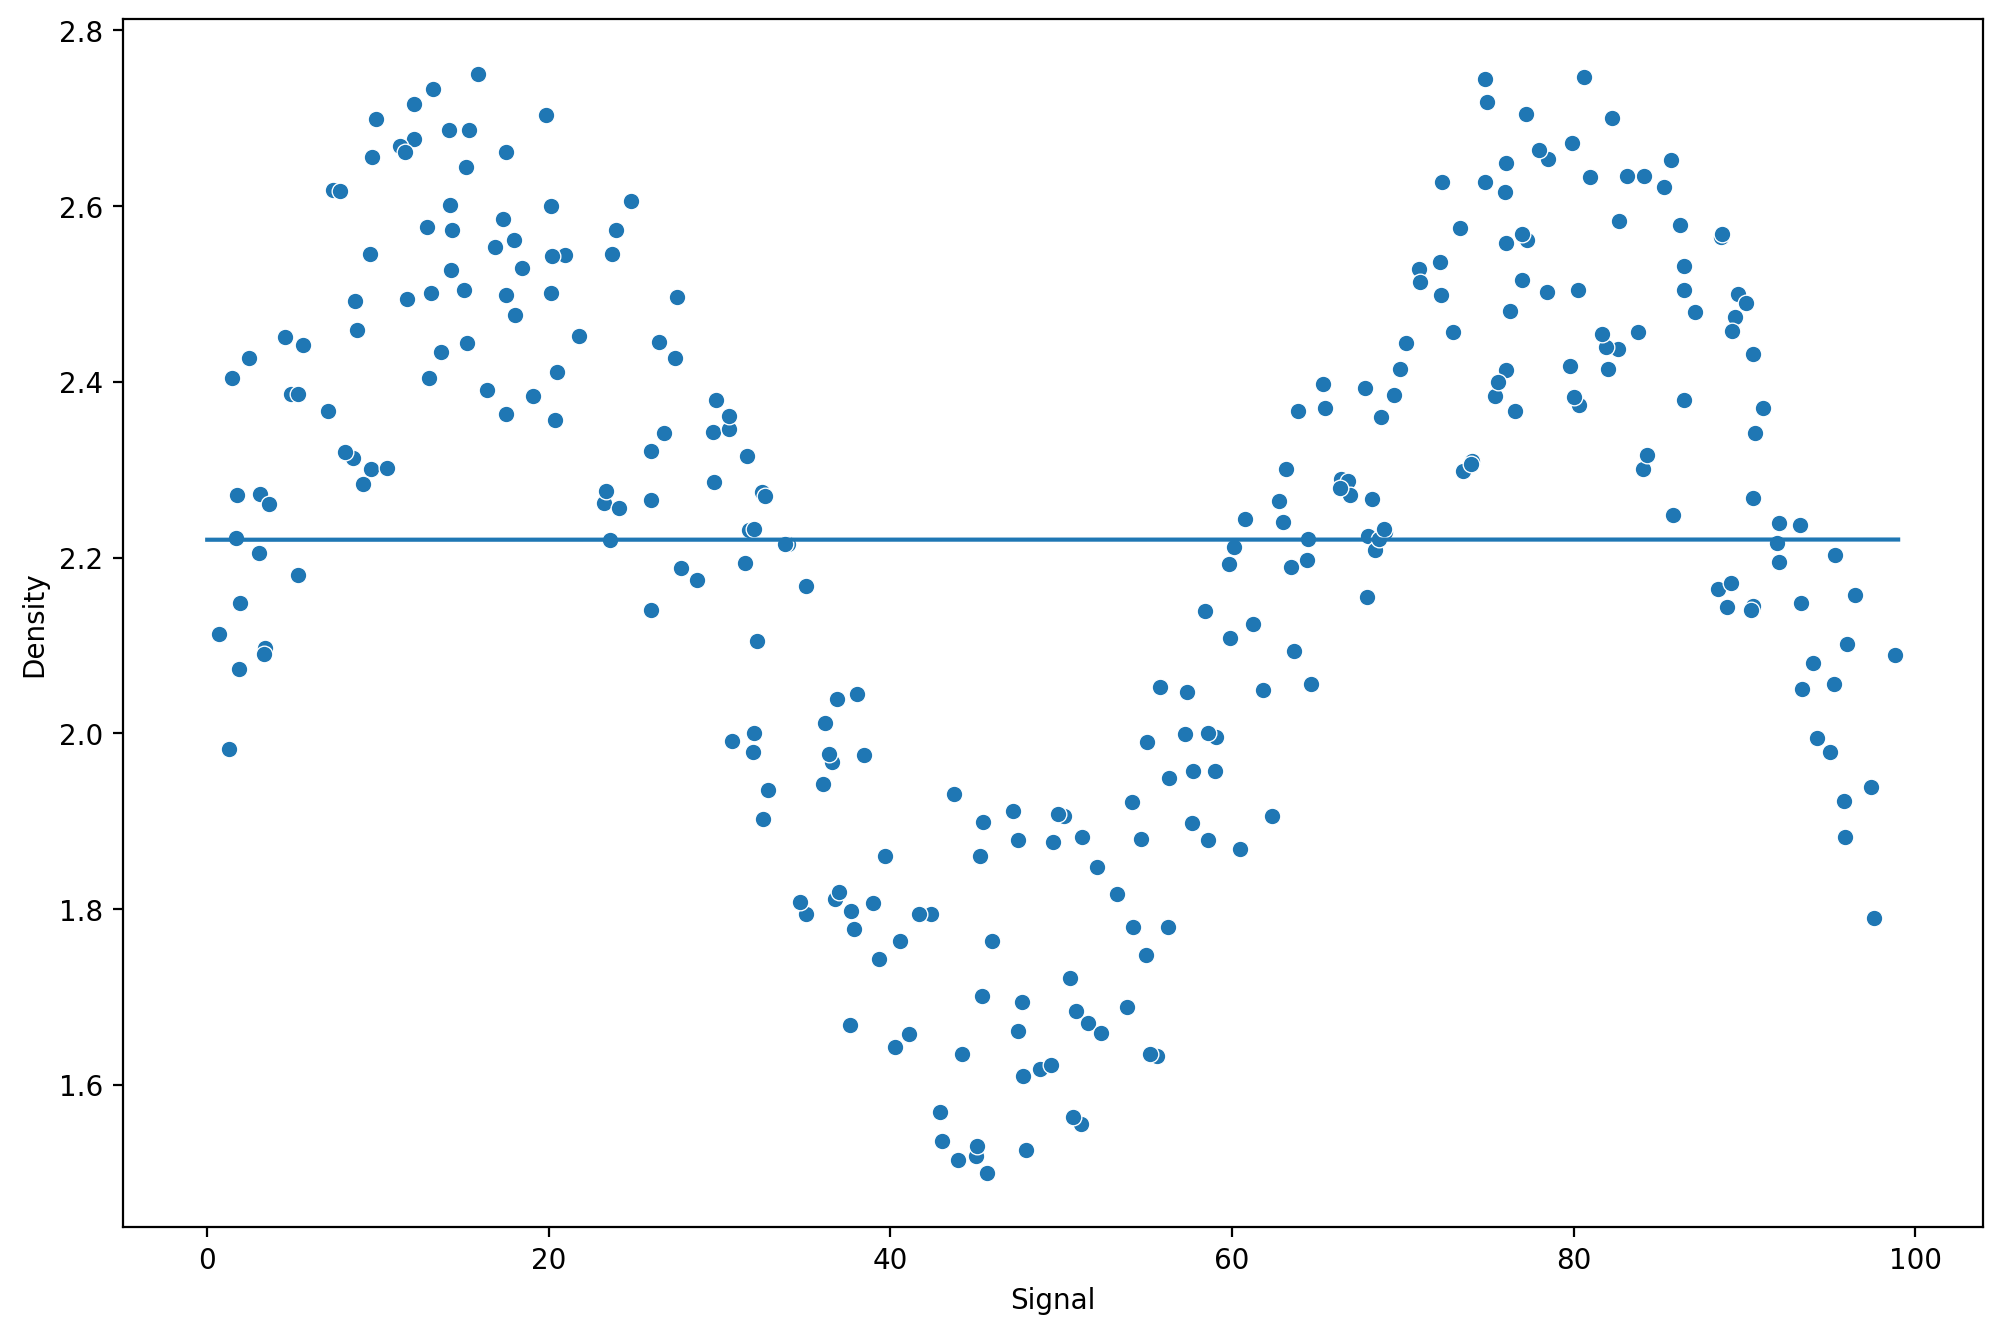

In [37]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)
plt.plot(signal_range, signal_preds)

In [93]:
def run_model(model, X_train, y_train, X_test, y_test):
    #Fit Model Training
    model.fit(X_train, y_train)
    
    #Get Metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    #Plot Results Model Signal Range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    
    plt.plot(signal_range, signal_preds)

MAE: 0.211198973318633
RMSE: 0.25700519965846297


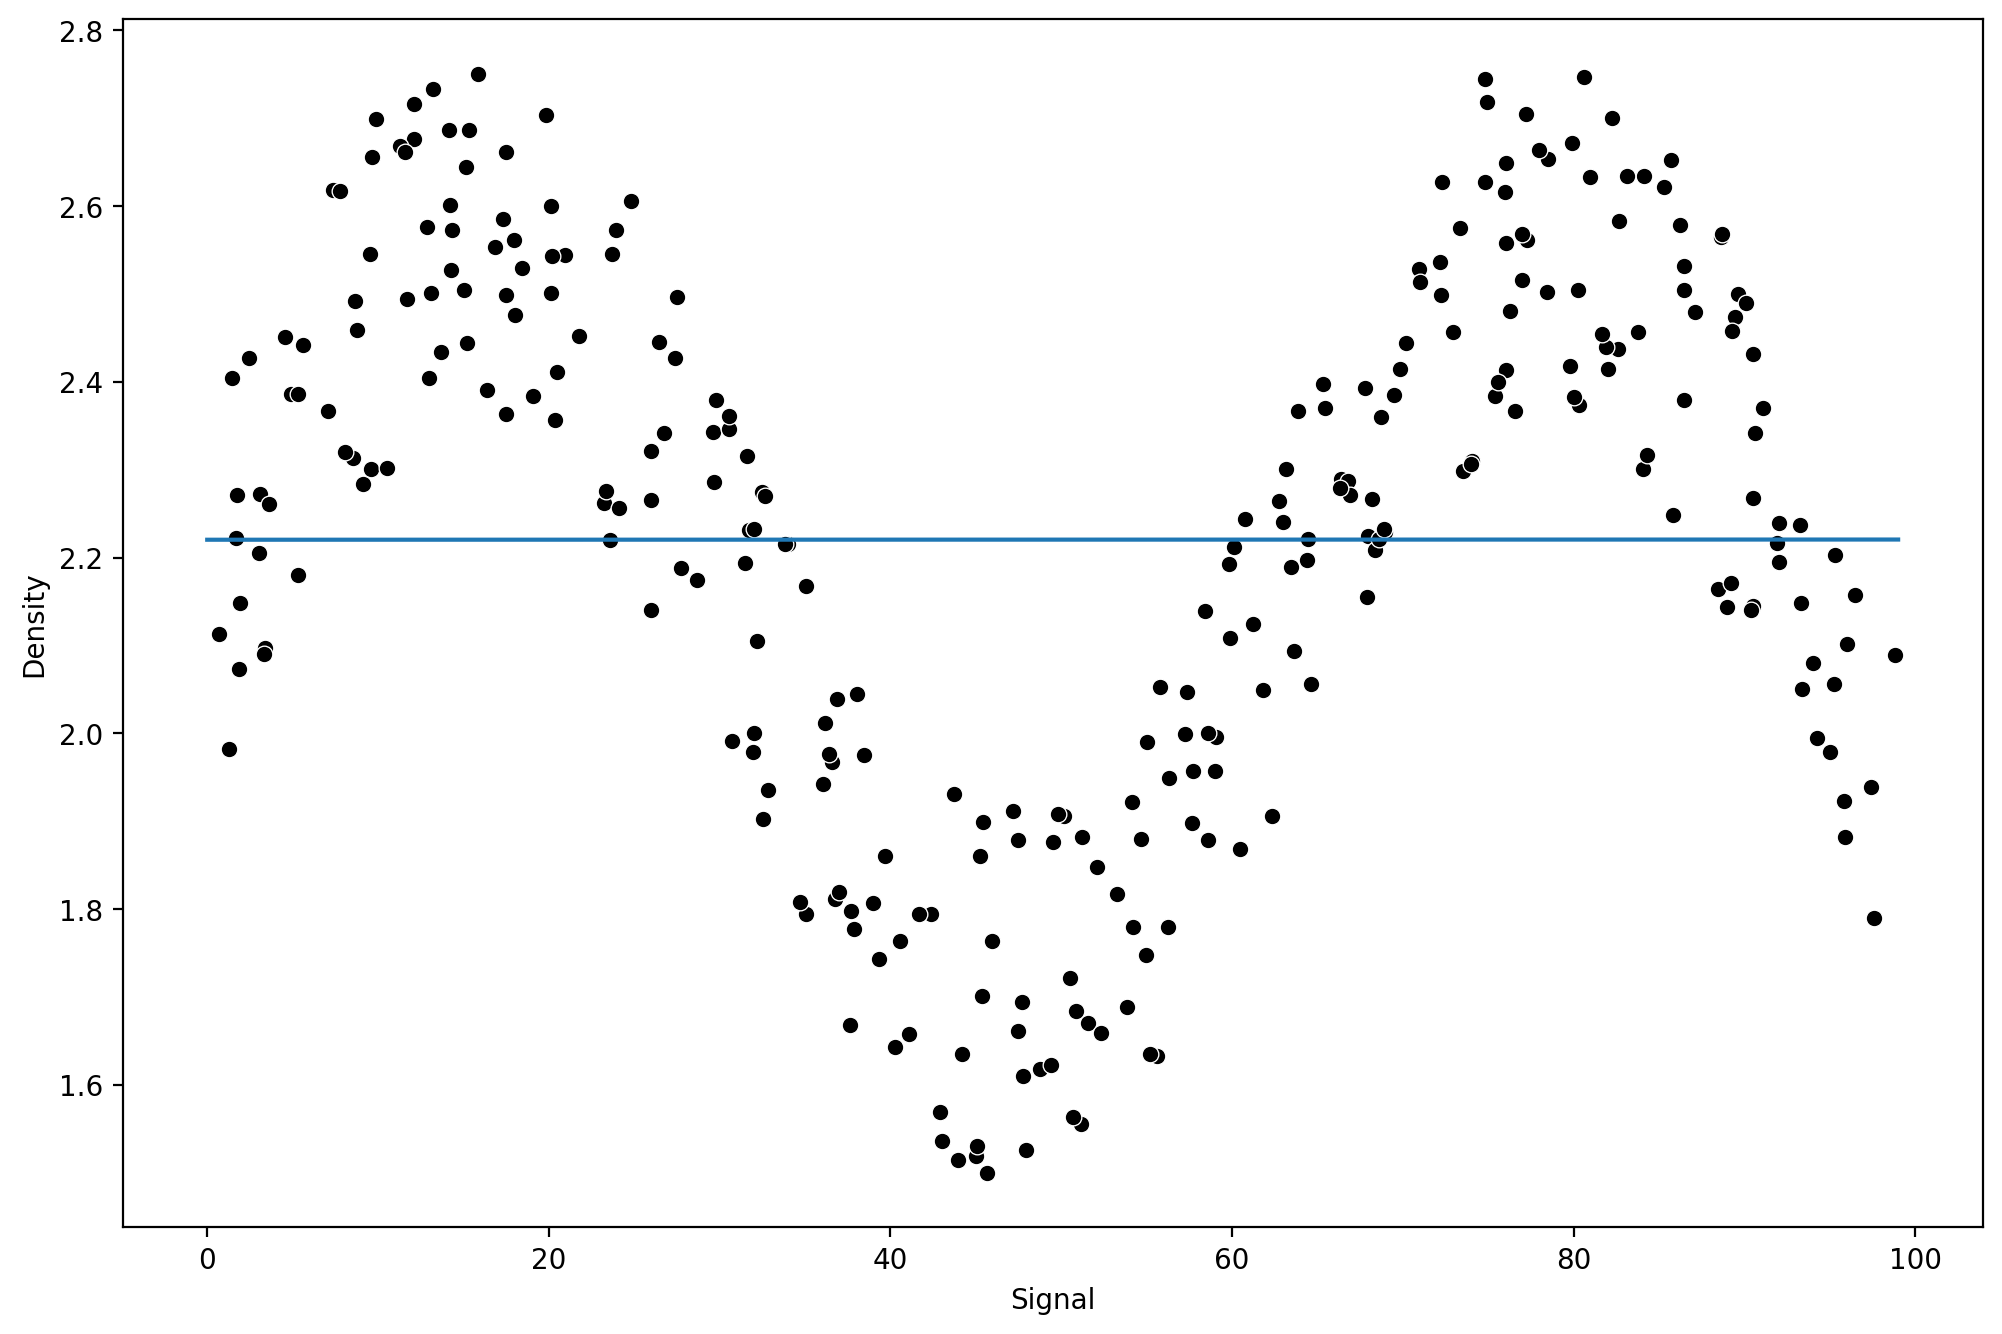

In [94]:
model = LinearRegression()

run_model(model, X_train, y_train, X_test, y_test)

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [102]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969098331143743
RMSE: 0.13807404229040557


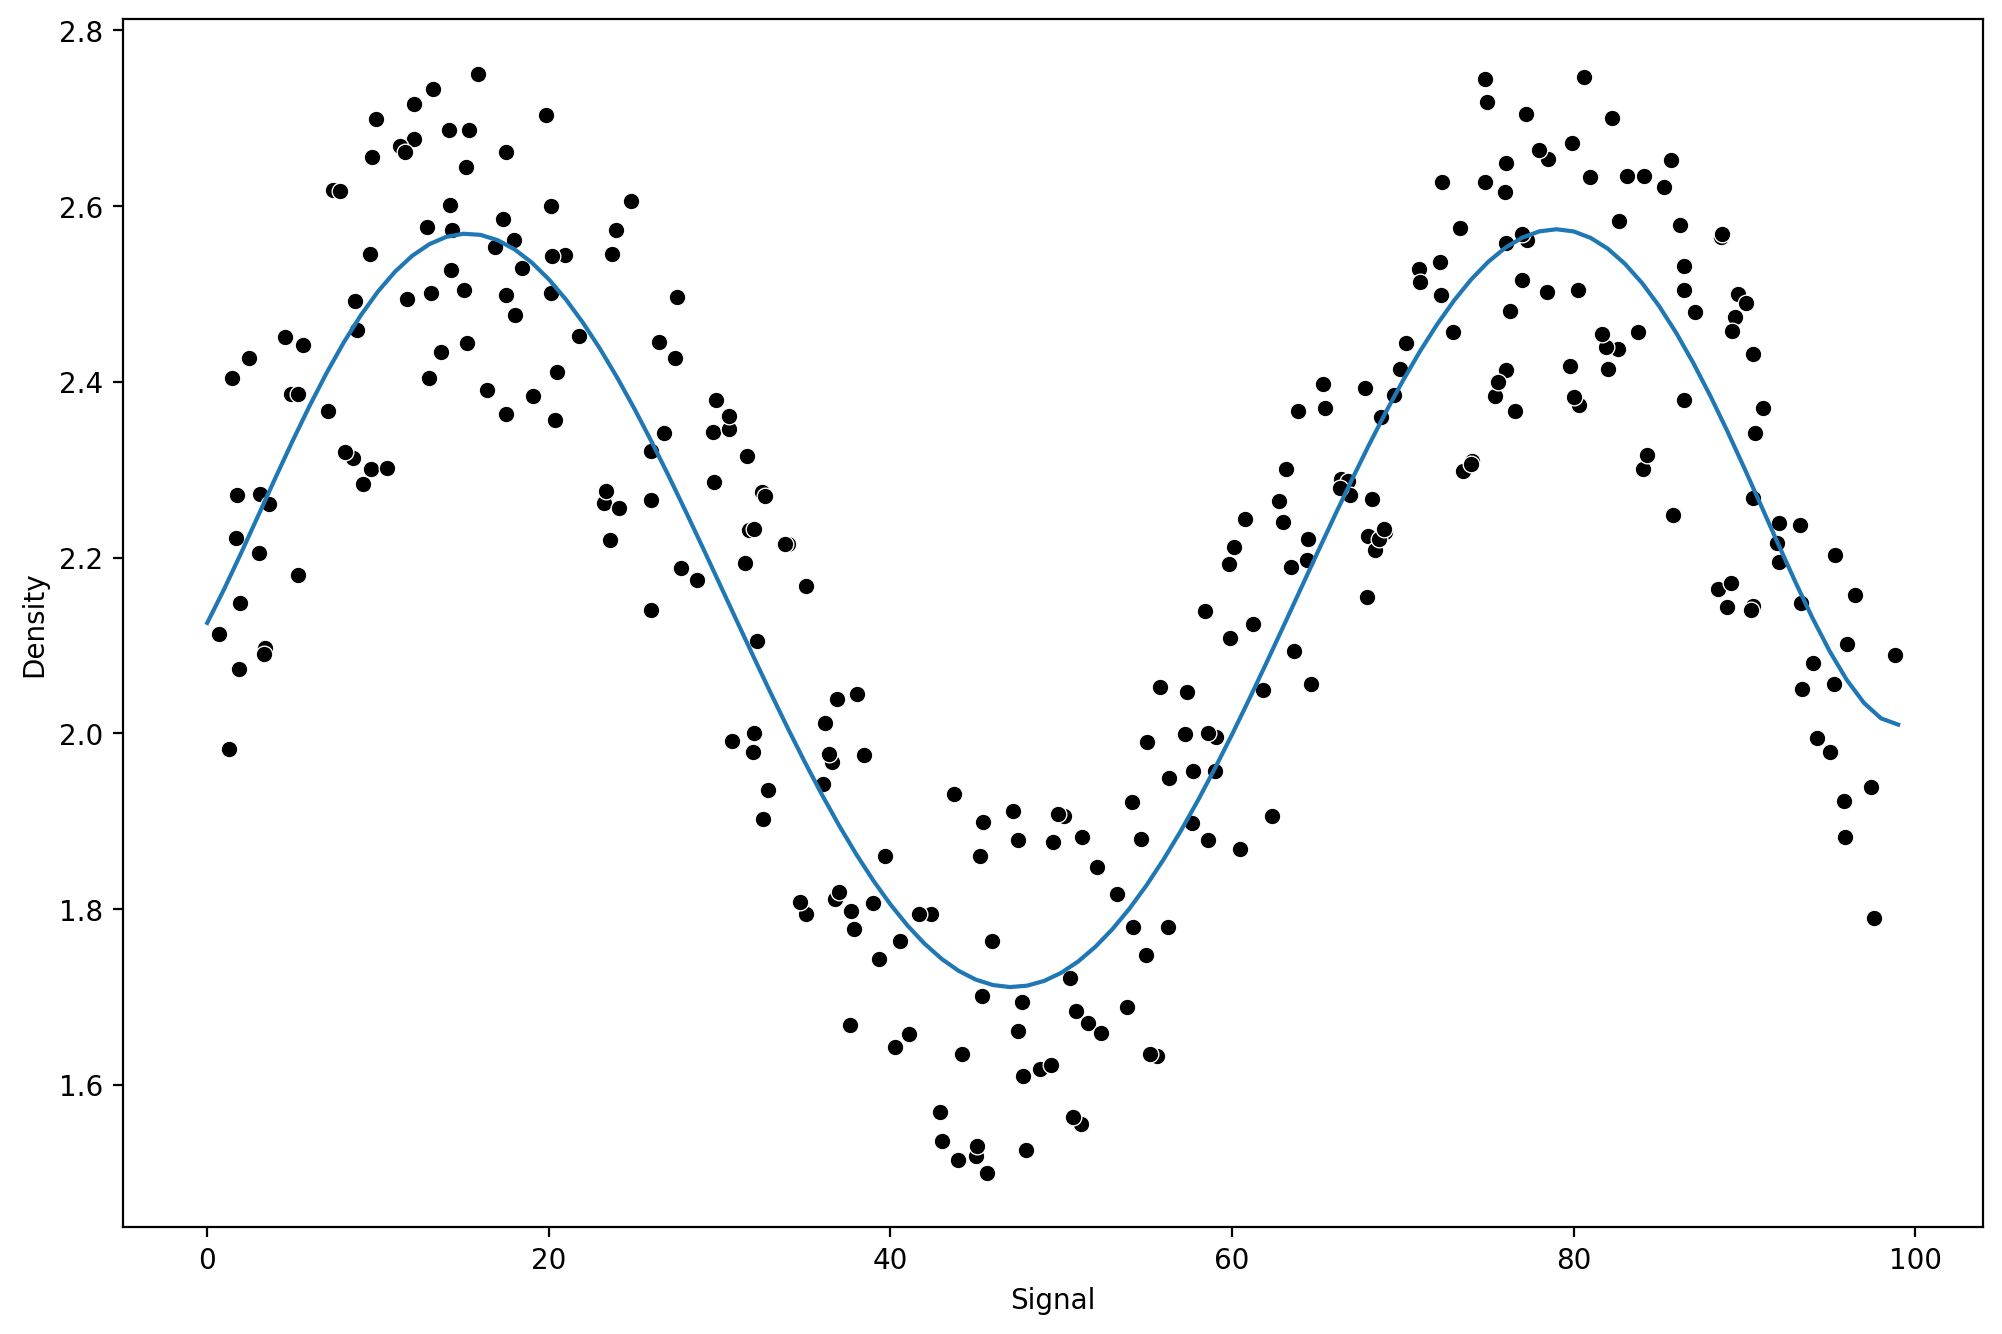

In [103]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [104]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372
MAE: 0.12198383614100564
RMSE: 0.13730685016923655
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


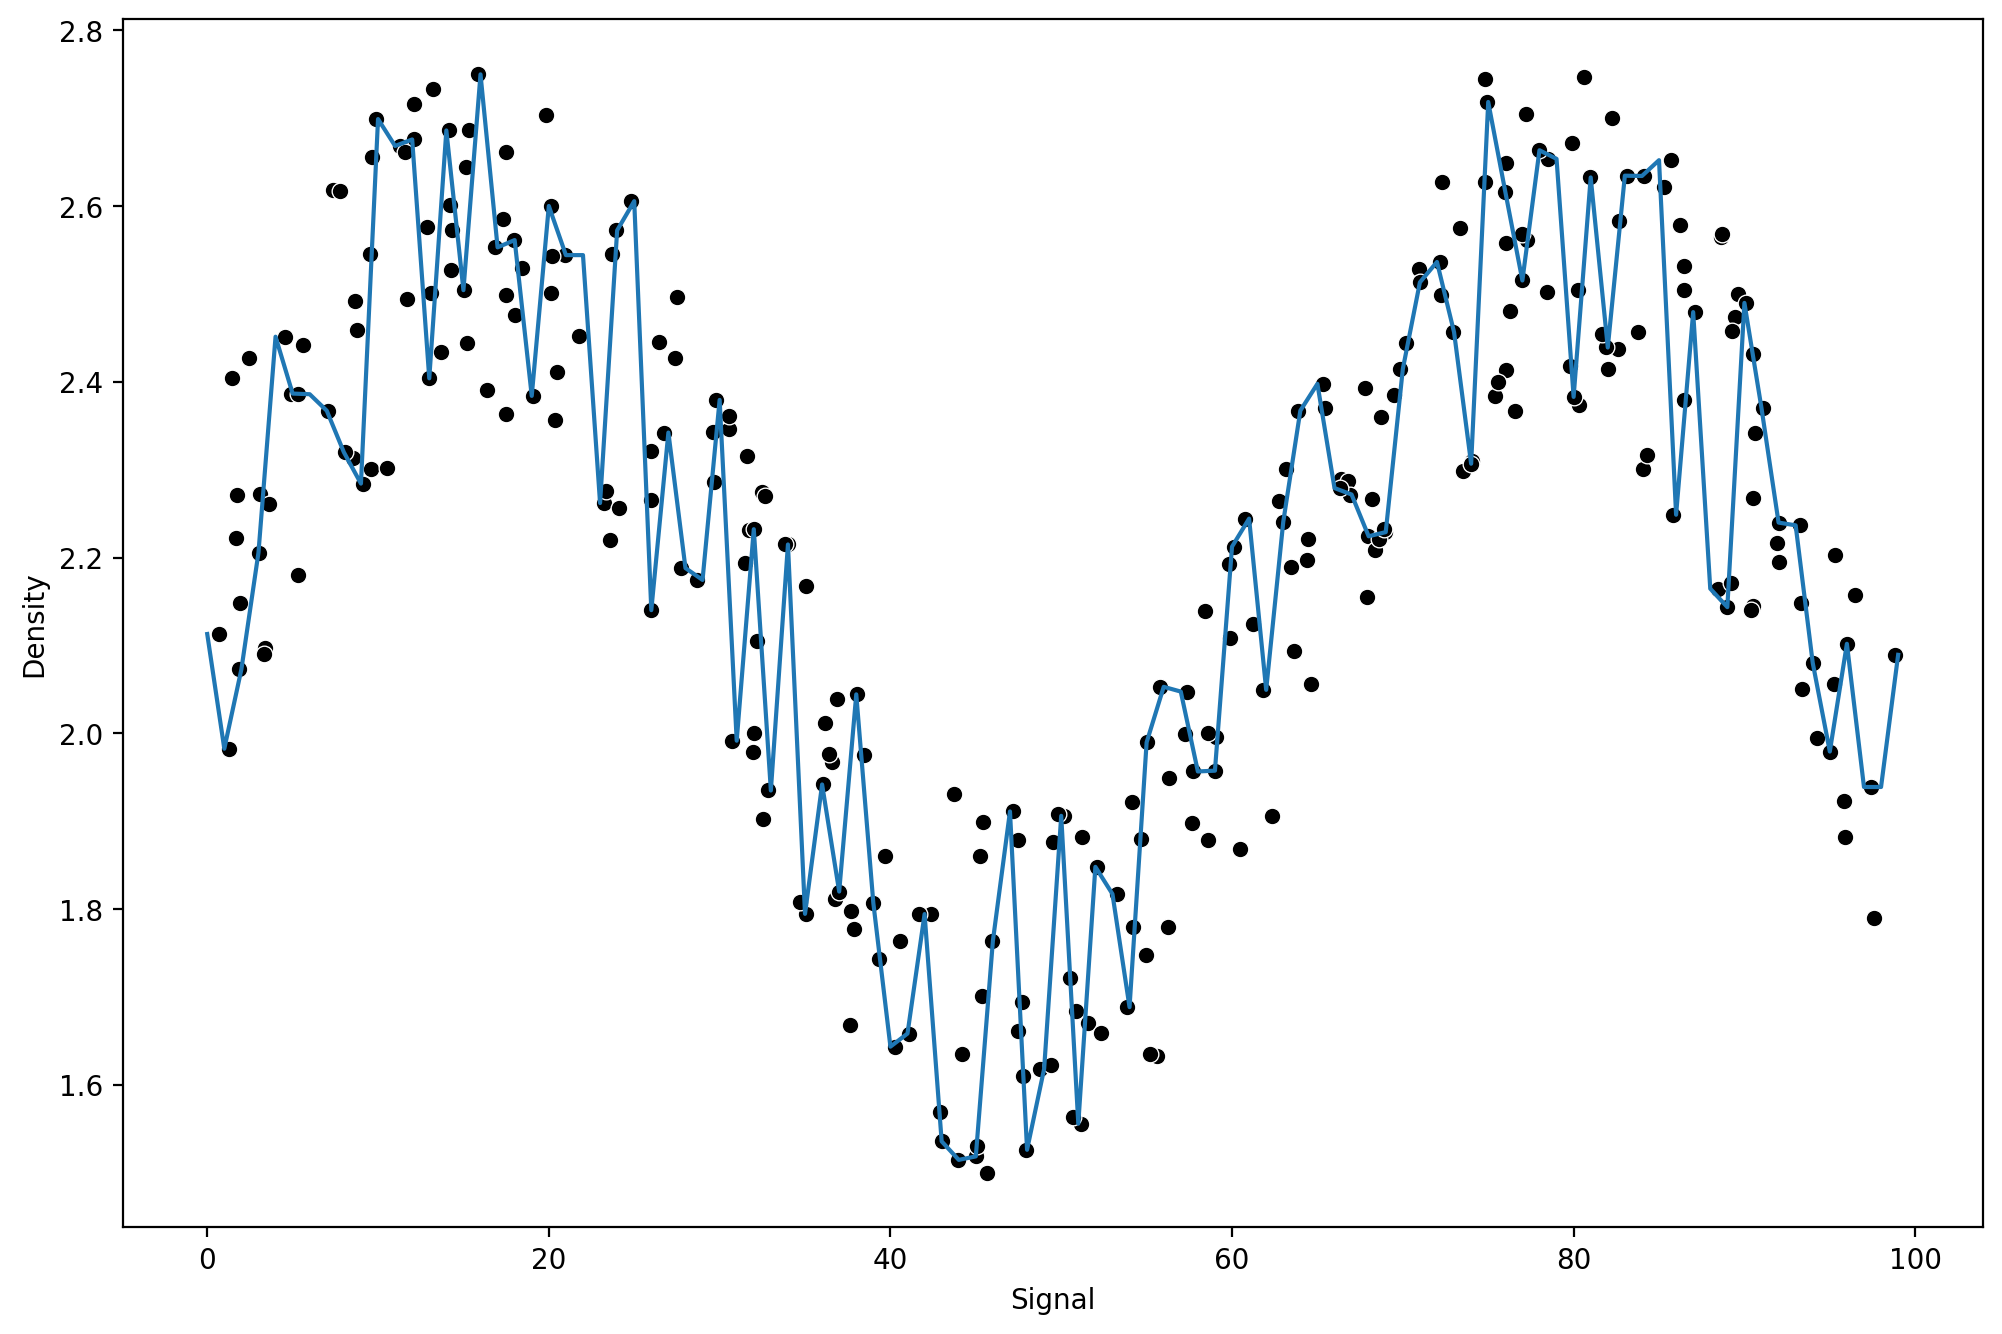

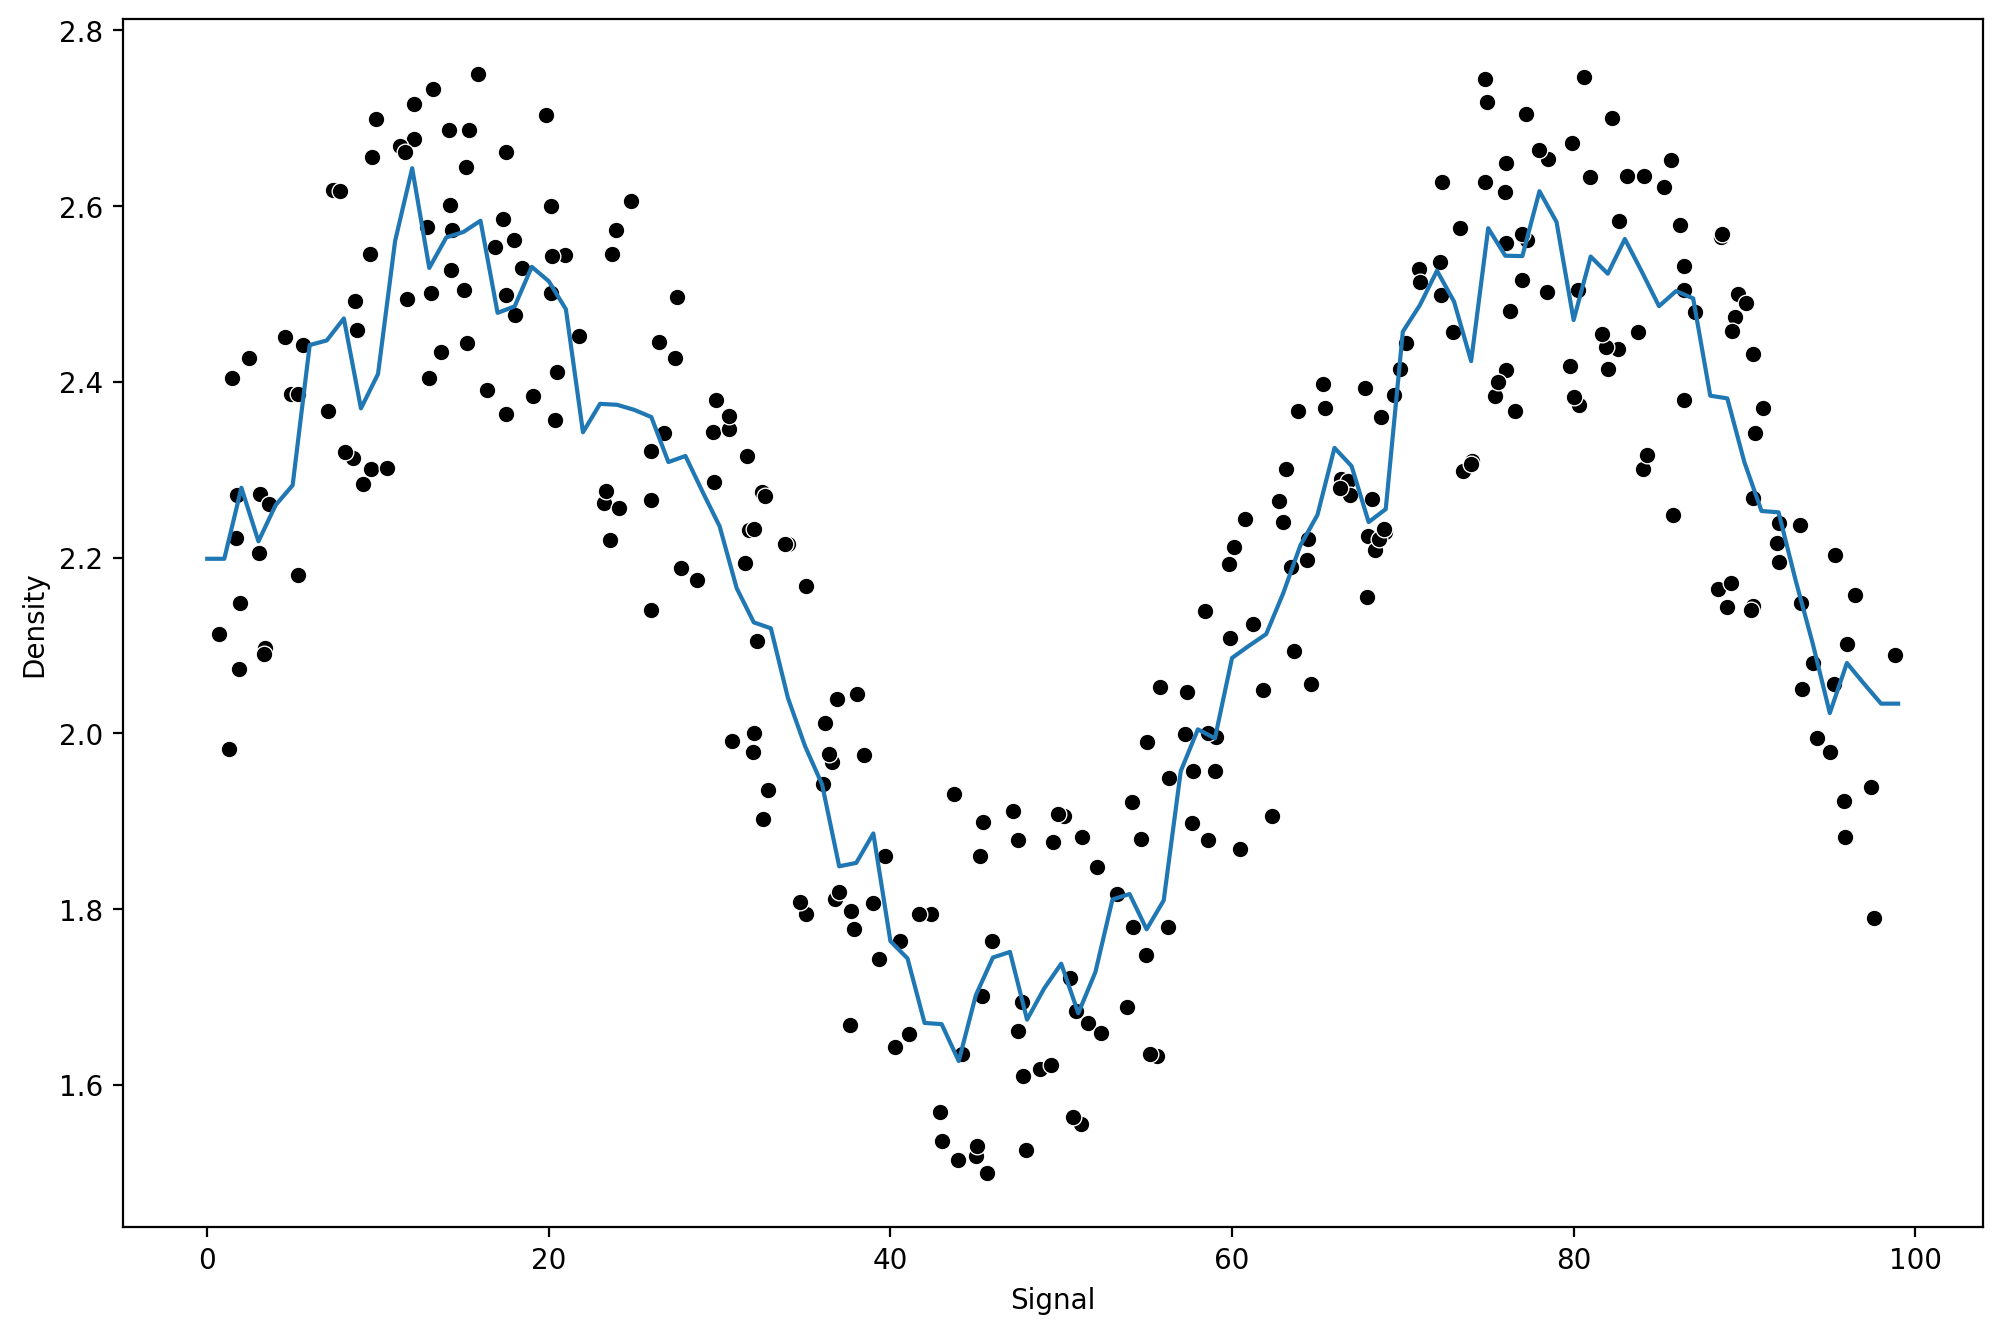

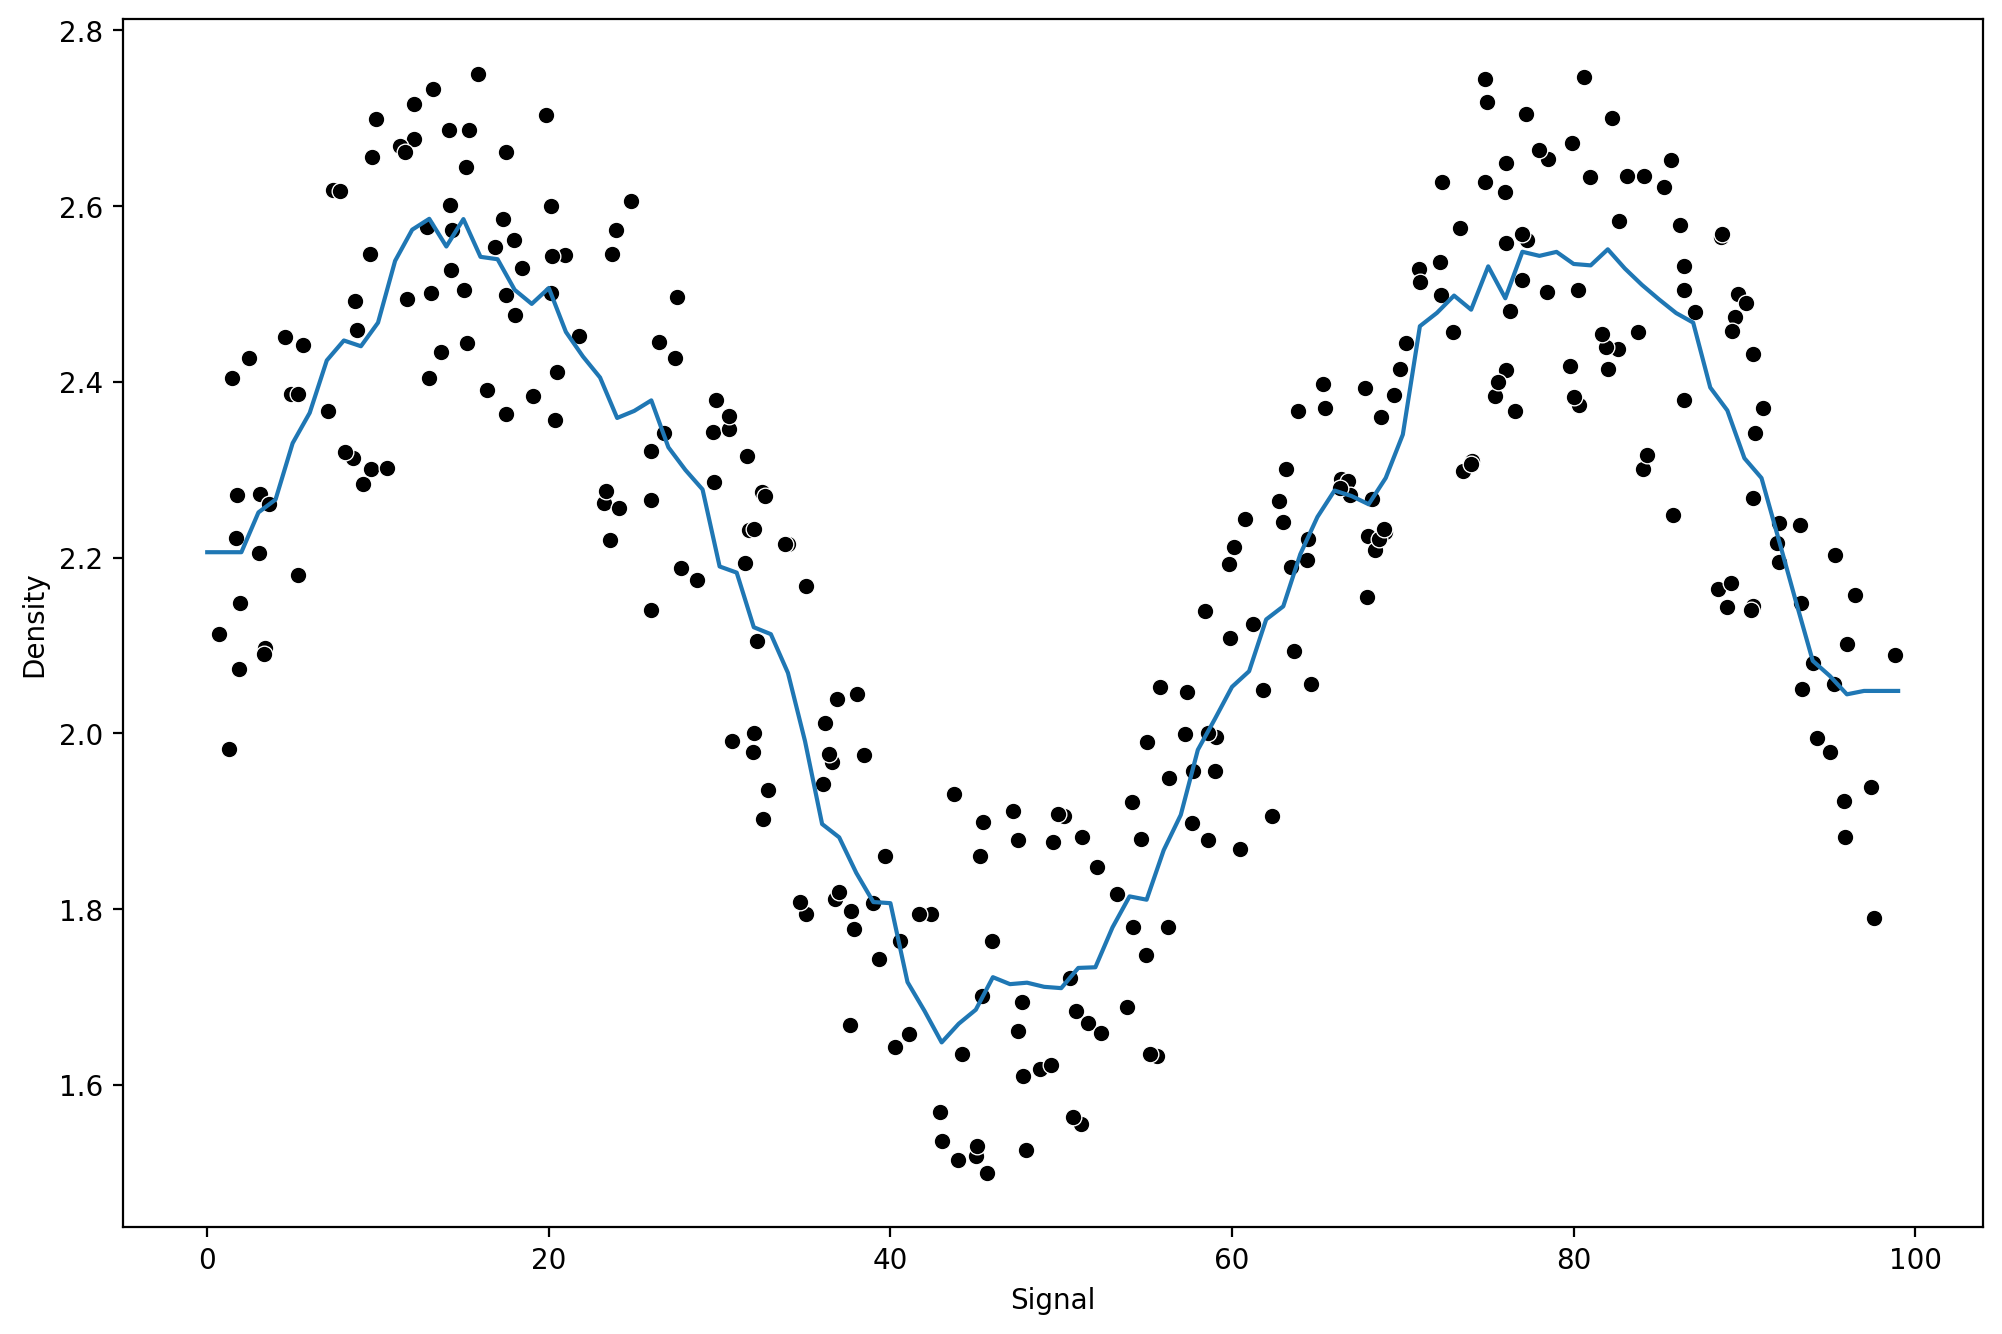

In [105]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [106]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372


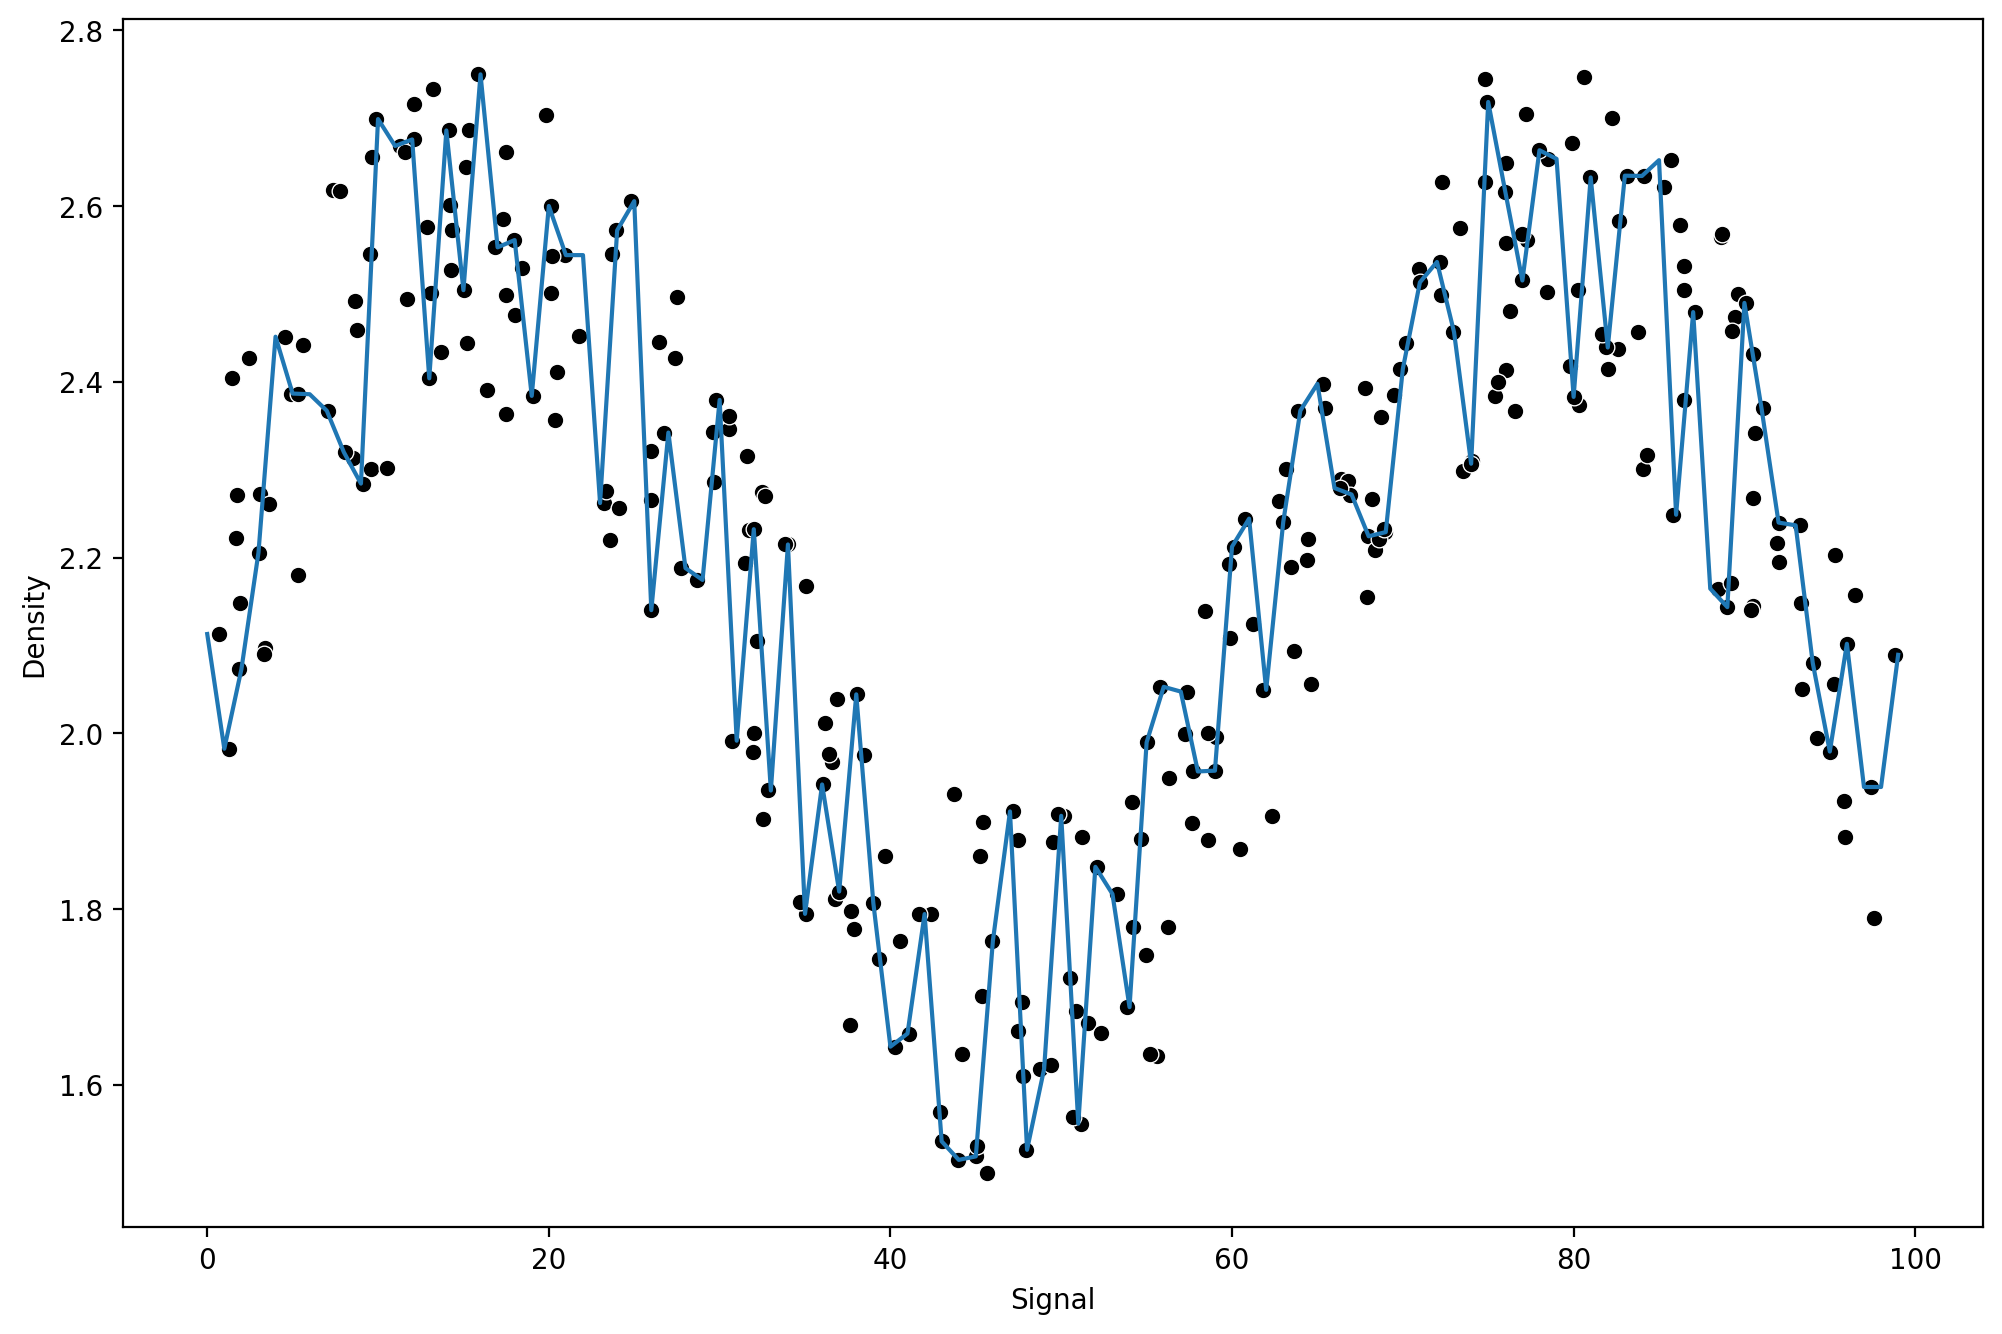

In [108]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [109]:
from sklearn.svm import SVR

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
svr = SVR()
param_grid = {'C':[0.01, 0.1, 1, 5, 10, 100, 1000],
             'gamma':['auto','scale']}
grid = GridSearchCV(svr, param_grid)

MAE: 0.10839253242165772
RMSE: 0.12634668775105407


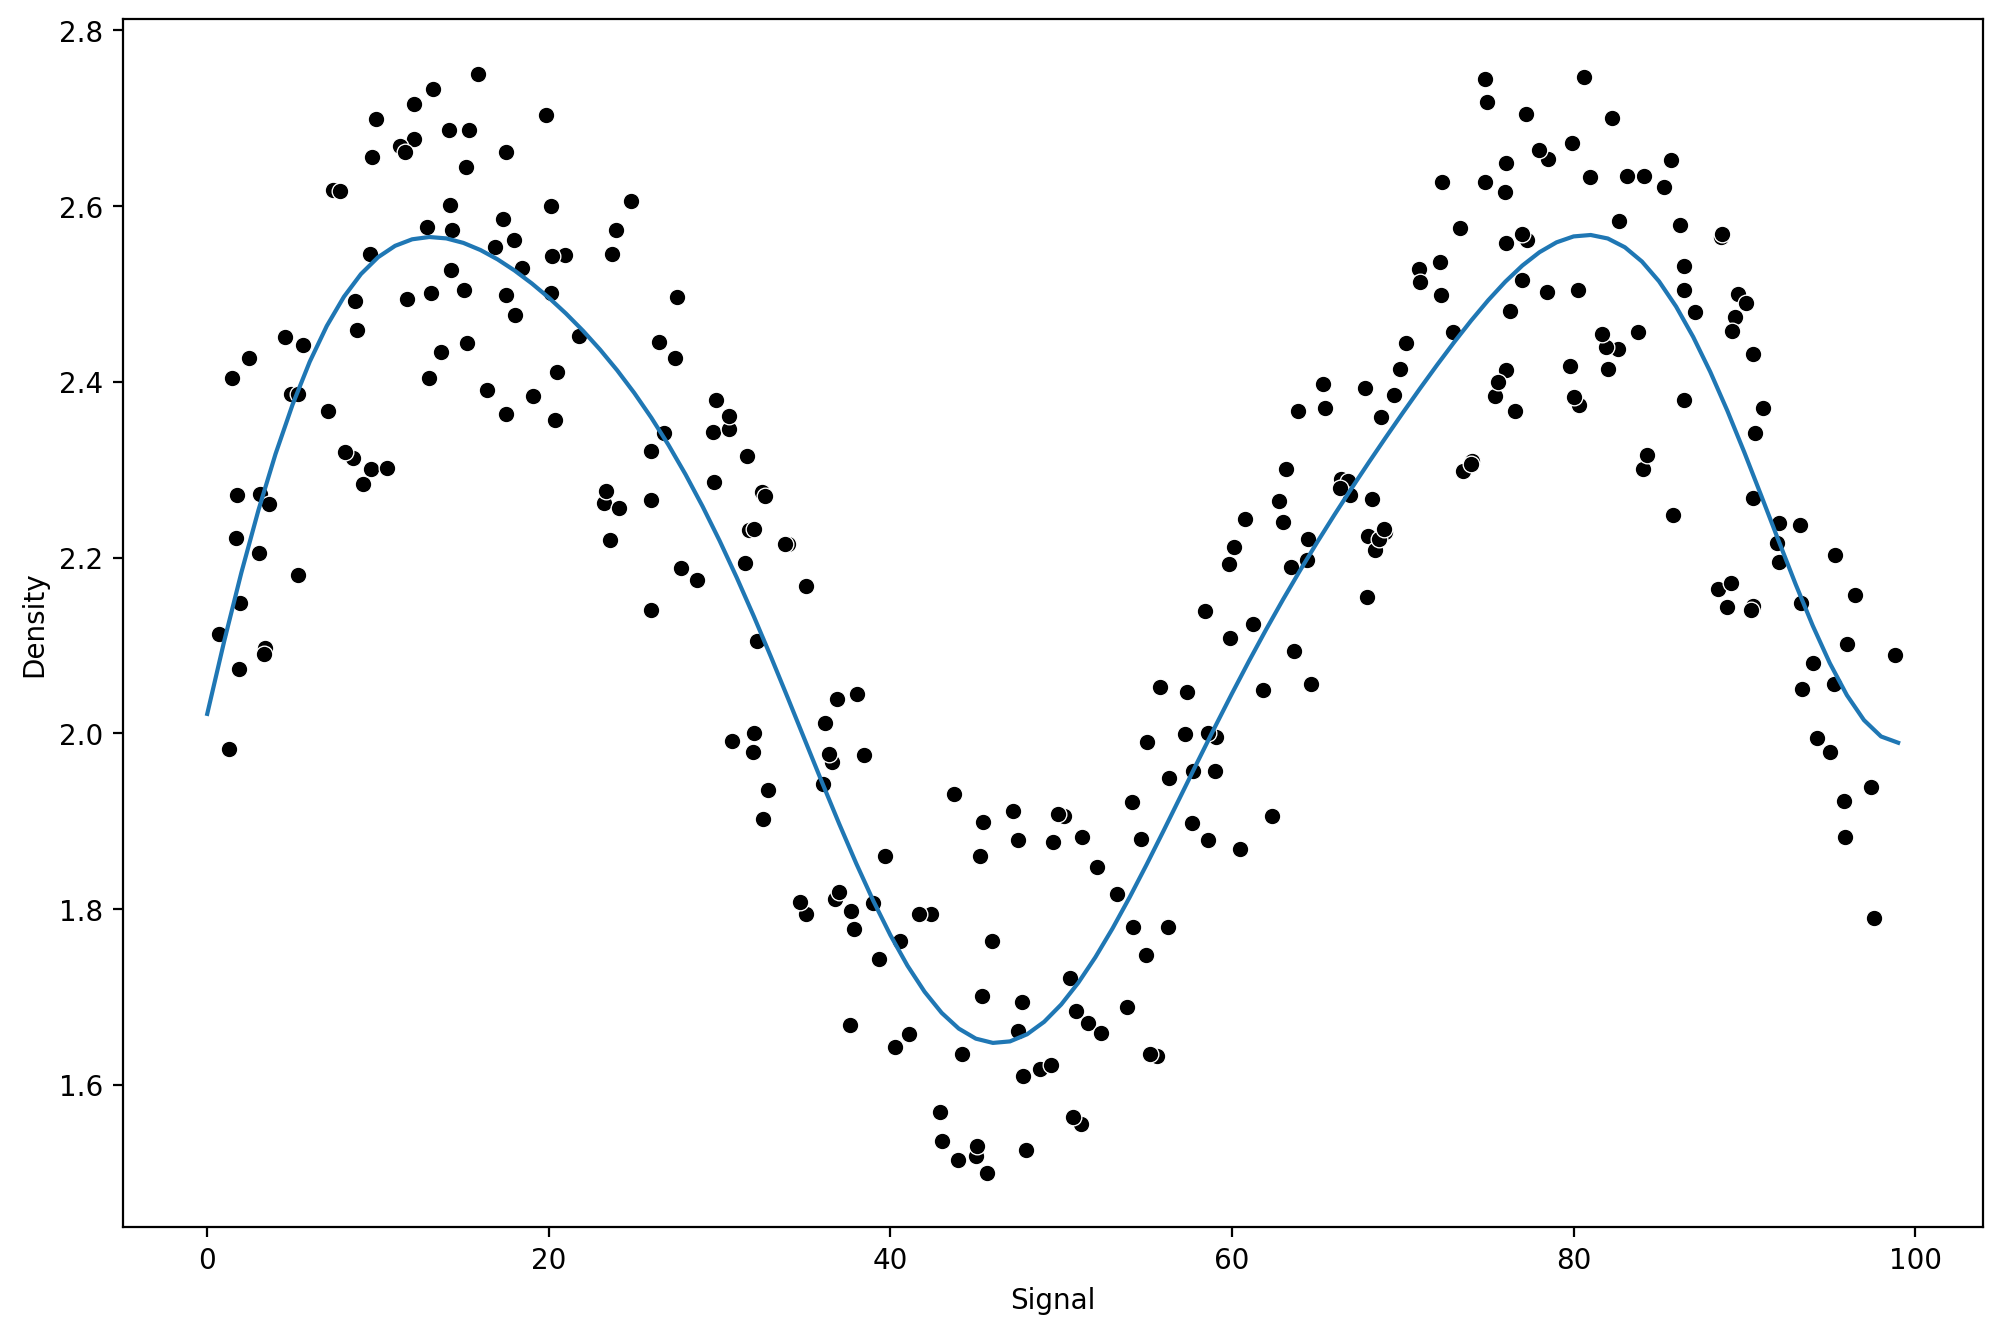

In [112]:
run_model(grid, X_train, y_train, X_test, y_test)

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.10321072852821912
RMSE: 0.12778068914263682


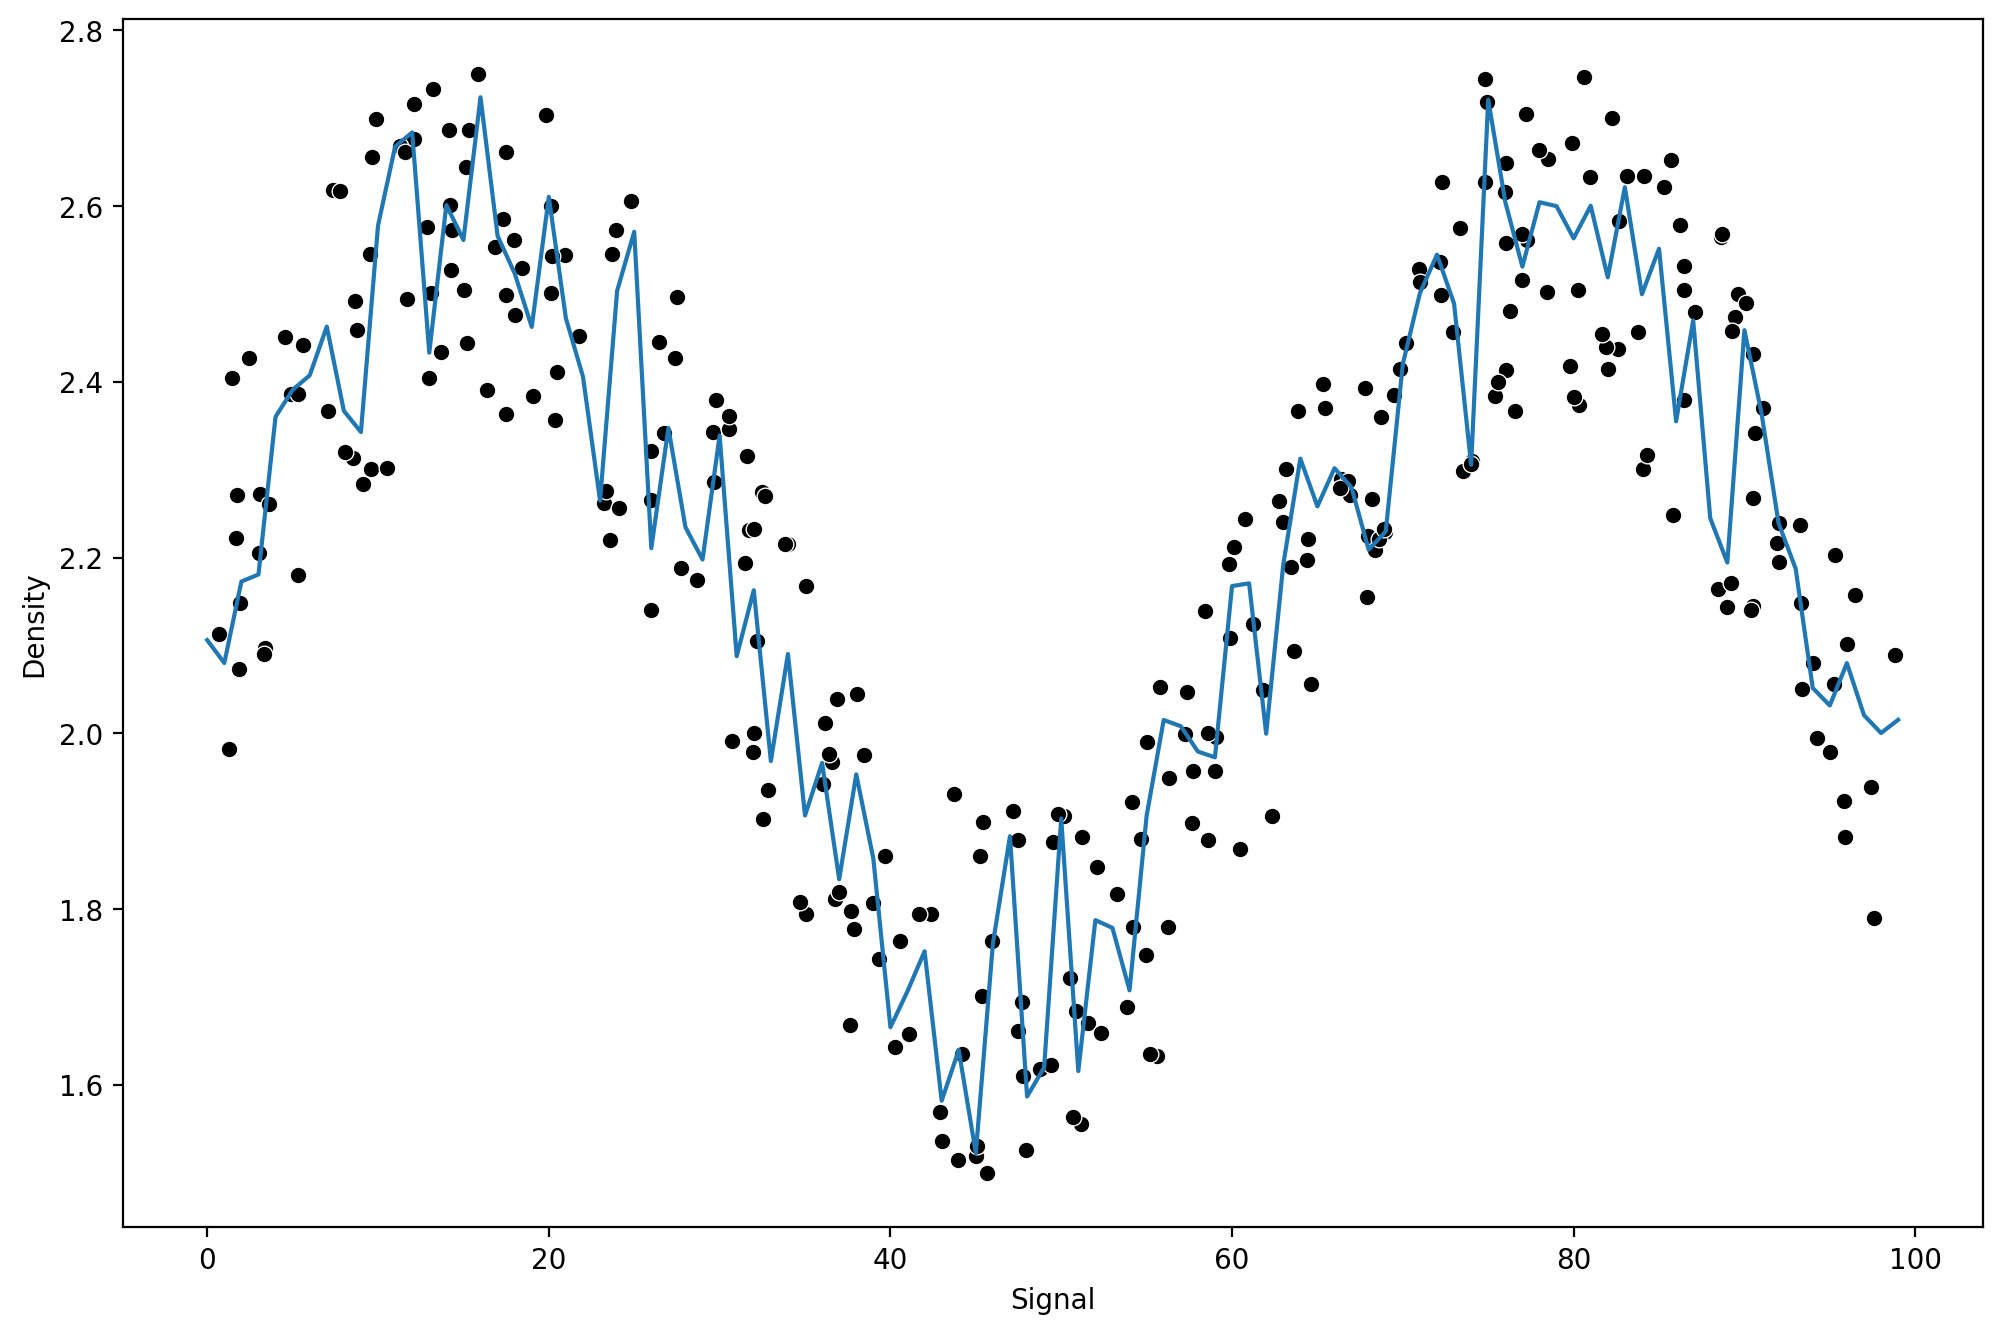

In [115]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [116]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [117]:
model = GradientBoostingRegressor()

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


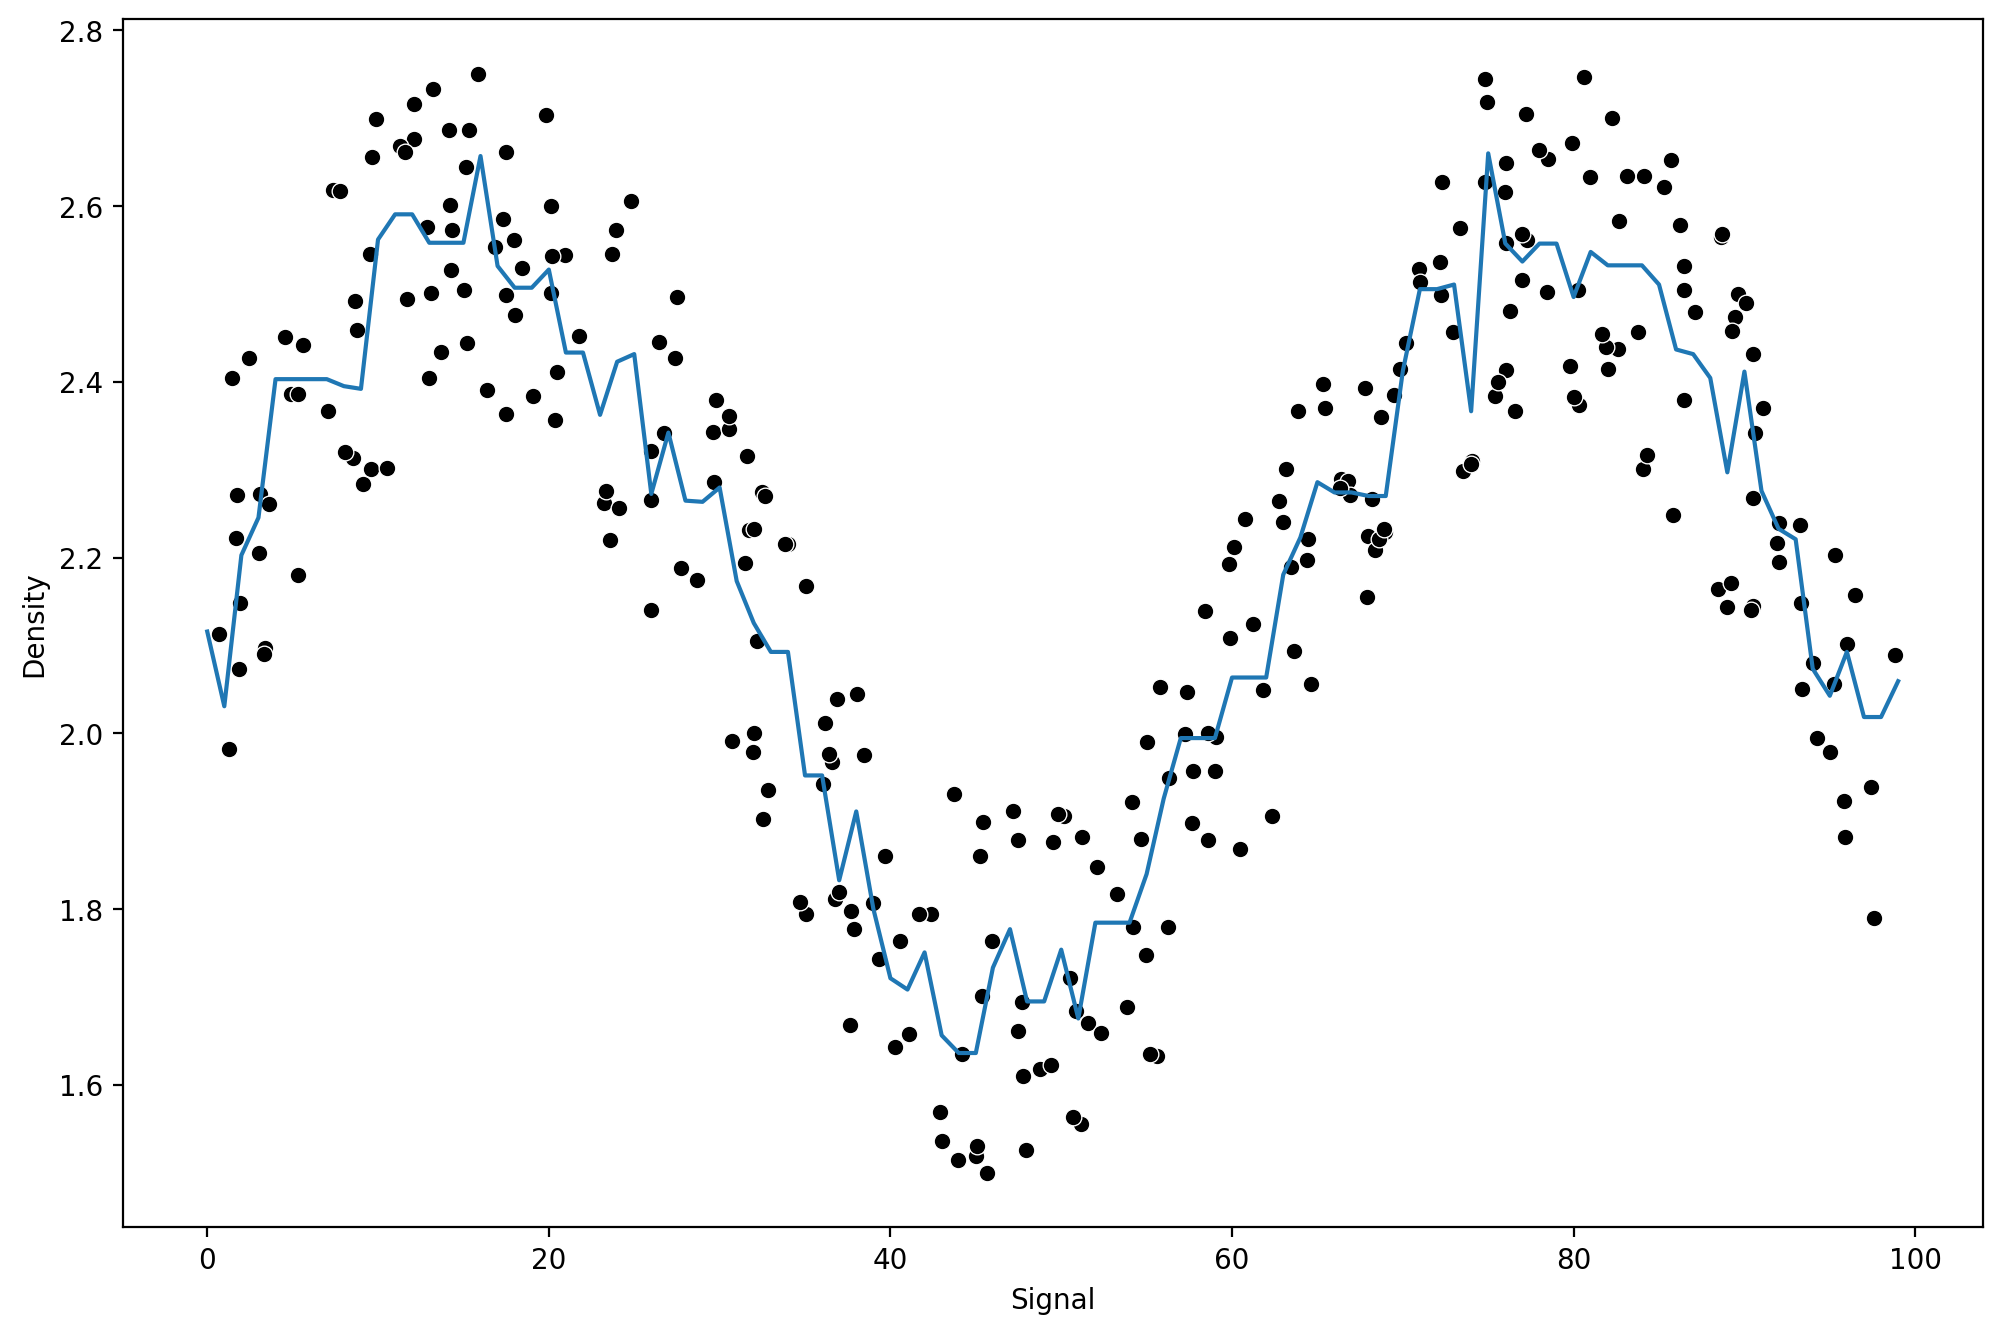

In [118]:
run_model(model, X_train, y_train, X_test, y_test)

In [120]:
model = AdaBoostRegressor()

MAE: 0.11885622752809015
RMSE: 0.13572894007396769


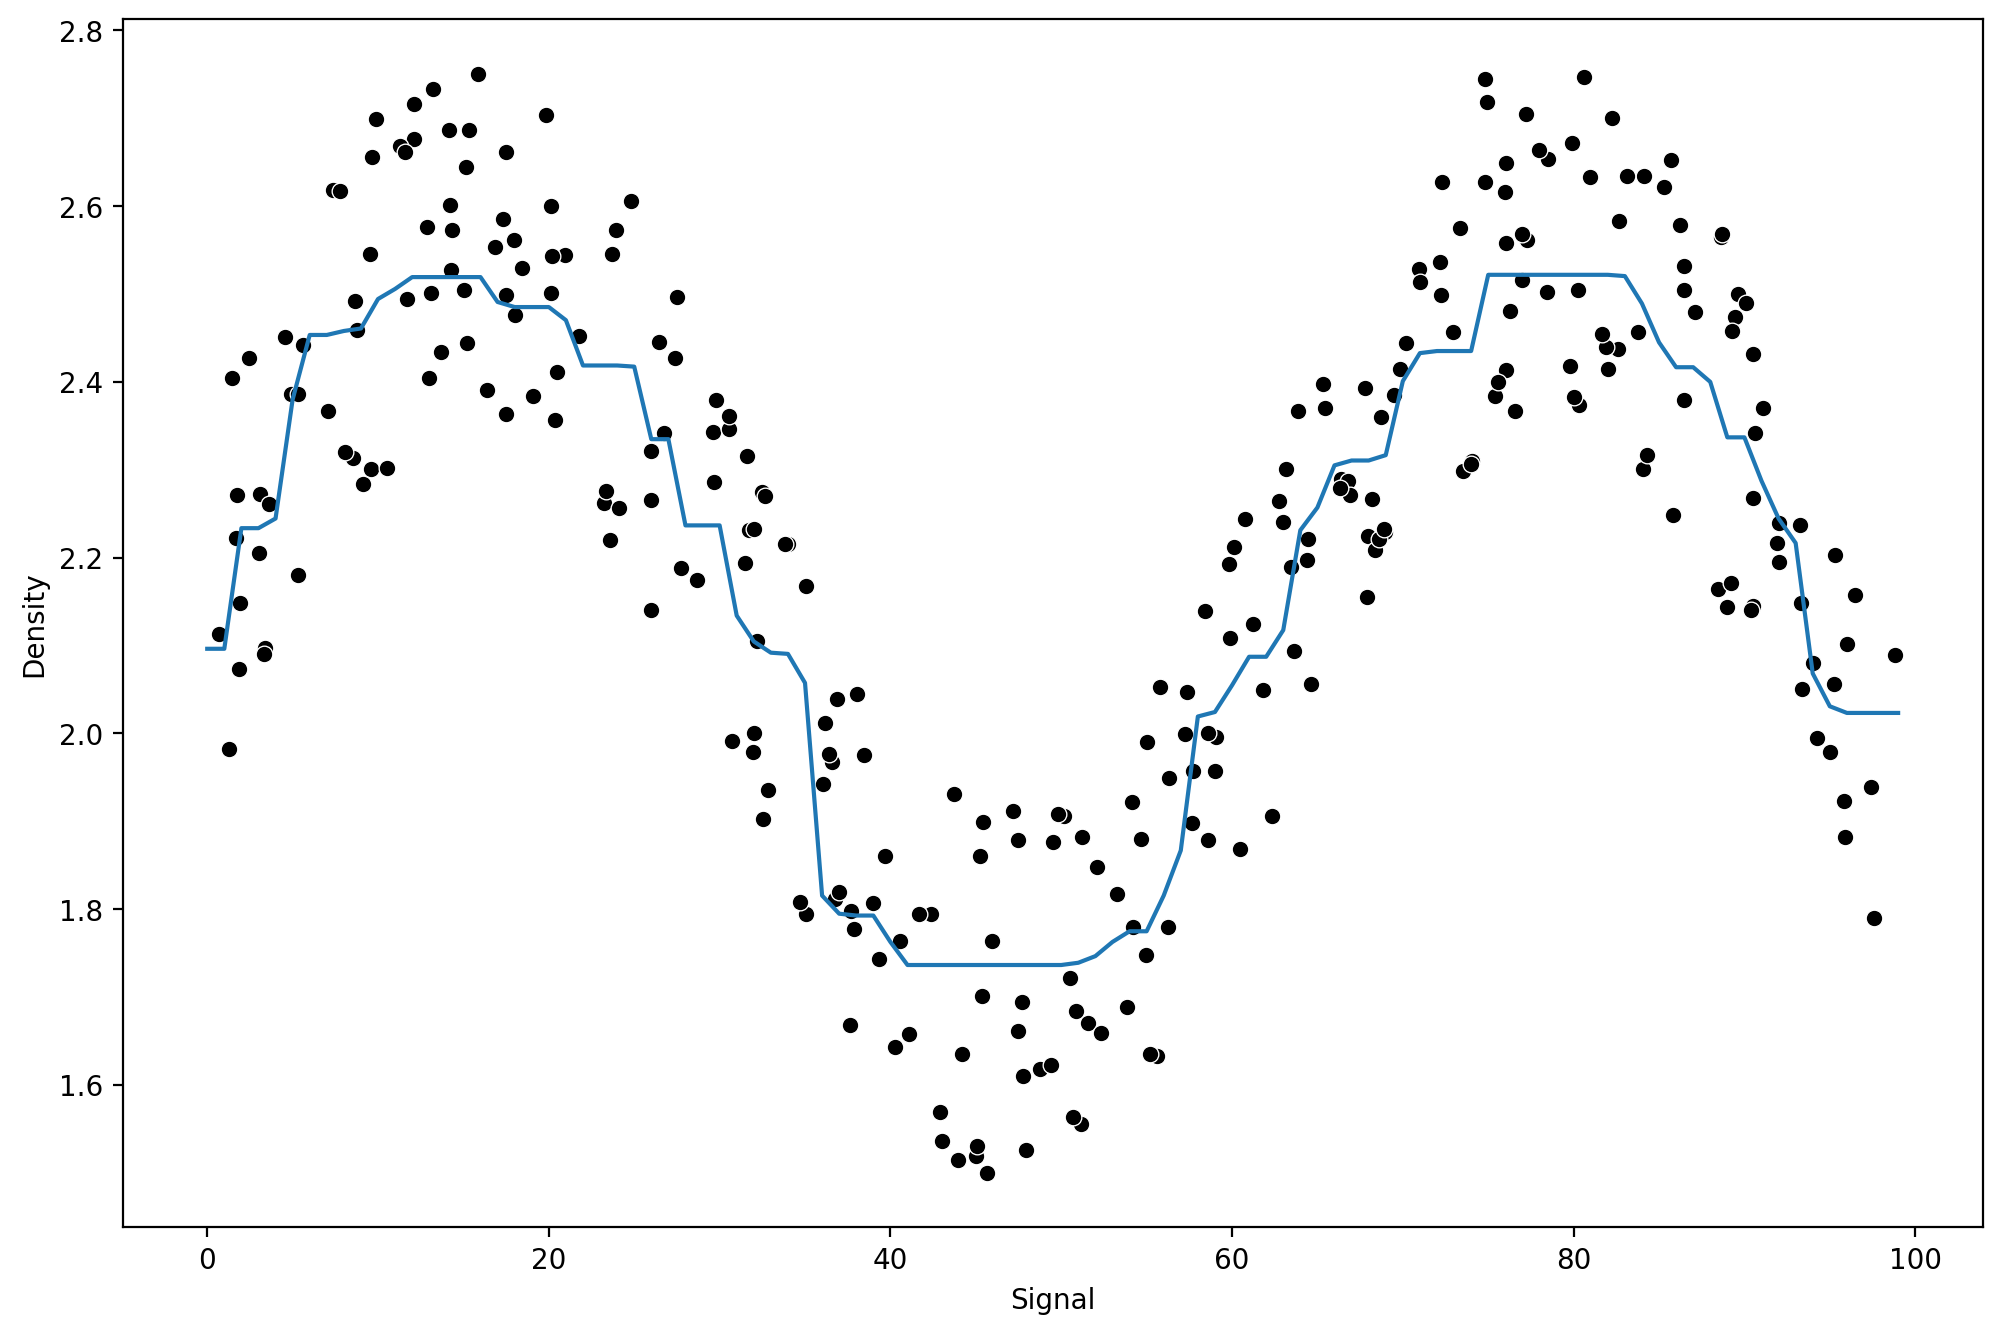

In [121]:
run_model(model, X_train, y_train, X_test, y_test)